In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [4]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [5]:
len(X_train)

60000

In [6]:
len(X_test)

10000

In [7]:
X_train[0].shape

(28, 28)

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

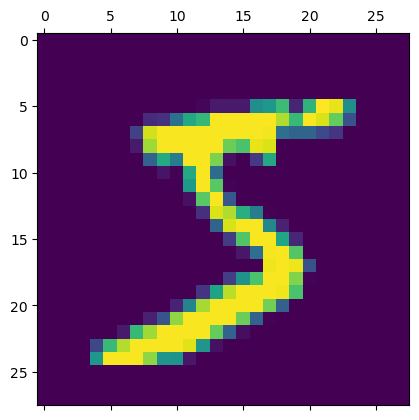

In [9]:
plt.matshow(X_train[0])

In [10]:
y_train[0]

5

In [11]:
X_train = X_train / 255
X_test = X_test / 255

In [12]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_train_flattened.shape

(60000, 784)

In [13]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)



Epoch 1/5


1875/1875 [==============================] - 3s 1ms/step - loss: 0.4623 - accuracy: 0.8786
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3034 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2829 - accuracy: 0.9203
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2732 - accuracy: 0.9242
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2662 - accuracy: 0.9249


In [14]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2654 - accuracy: 0.9276


[0.2653718888759613, 0.9276000261306763]

In [15]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 916us/step


array([1.3810846e-02, 3.0079539e-07, 7.2742134e-02, 9.4698089e-01,
       2.1635261e-03, 1.1444022e-01, 8.0606600e-07, 9.9976963e-01,
       8.4073454e-02, 5.9352726e-01], dtype=float32)

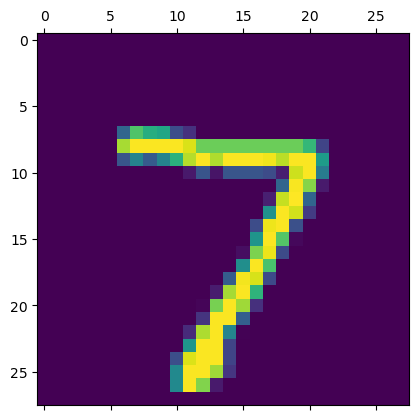

In [16]:
plt.matshow(X_test[0])

In [17]:
np.argmax(y_predicted[0])

7

In [18]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [19]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [20]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    2,    2,    0,    4,    8,    2,    3,    0],
       [   0, 1108,    5,    1,    0,    1,    4,    2,   14,    0],
       [   4,    7,  940,   10,    7,    3,   13,   10,   33,    5],
       [   3,    0,   25,  913,    0,   26,    3,   11,   20,    9],
       [   1,    1,    5,    1,  910,    0,   13,    4,   10,   37],
       [   9,    2,    4,   30,    8,  779,   18,    4,   31,    7],
       [   9,    3,    6,    1,    7,   10,  918,    2,    2,    0],
       [   1,    5,   24,    6,    7,    0,    0,  956,    3,   26],
       [   5,    5,    7,   19,    9,   21,   11,   13,  878,    6],
       [  10,    7,    1,   10,   26,    5,    0,   26,    9,  915]])>

Text(95.72222222222221, 0.5, 'Truth')

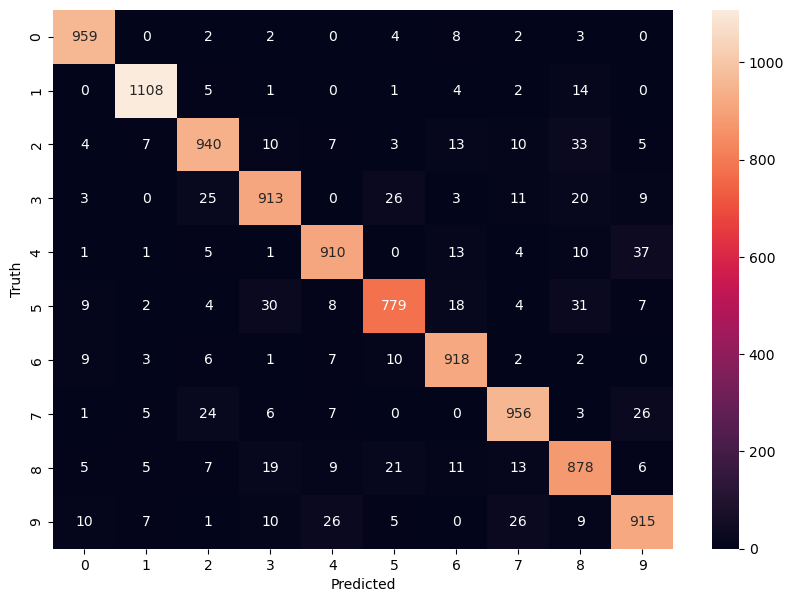

In [21]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')   
plt.ylabel('Truth')